# Formative Assessment: NLP - Emotion Classification in Text

In [44]:
import pandas as pd

# Load dataset
df = pd.read_csv('nlp_dataset.csv')

First few rows of the dataset

In [45]:
df.head(10)

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
5,i feel jealous becasue i wanted that kind of l...,anger
6,when a friend of mine keeps telling me morbid ...,anger
7,i finally fell asleep feeling angry useless an...,anger
8,i feel a bit annoyed and antsy in a good way,anger
9,i feel like i ve regained another vital part o...,joy


Last few rows of the dataset

In [46]:
df.tail(10)

,Comment,Emotion
5927,i have never done anything to make her cry or ...,fear
5928,i feel angry because i have led myself to lead...,anger
5929,i mean weve been friends for a long time and t...,anger
5930,i think we often feel this way about planting ...,fear
5931,i have lost touch with the things that i feel ...,joy
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear
5936,i just wanted to apologize to you because i fe...,anger


 Basic information about the dataset

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


Summary statistics of the dataset

In [48]:
df.describe()

,Comment,Emotion
count,5937,5937
unique,5934,3
top,i feel like a tortured artist when i talk to her,anger
freq,2,2000


In [9]:
df.isnull().sum()

Comment    0
Emotion    0
dtype: int64

In [52]:
# Print column names
print(df.columns)


Index(['Comment', 'Emotion'], dtype='object')


Plot the distribution of emotions

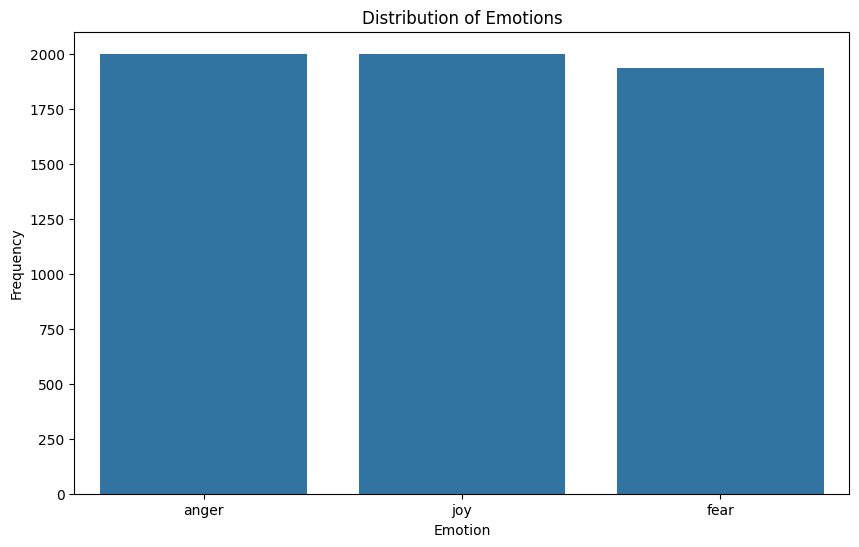

In [97]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Emotion', data=df, order=df['Emotion'].value_counts().index)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.show()


 # Text Cleaning and Tokenization

Text cleaning involves removing unwanted characters, lowercasing the text, and tokenizing the text into words. Tokenization is splitting the text into individual words or tokens.

In [32]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download stopwords if not already downloade

import nltk
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

# Define a function to clean text

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'\W+', ' ', text)  # Remove non-word characters
    tokens = word_tokenize(text)  # Tokenize text
    return tokens

# Apply text cleaning
df['cleaned_text'] = df['text'].apply(clean_text)
# Print the DataFrame to see the cleaned text
print(df[['text', 'cleaned_text']])


            text       cleaned_text
0     I am happy     [i, am, happy]
1     I feel sad     [i, feel, sad]
2   I am excited   [i, am, excited]
3     I am angry     [i, am, angry]
4  I feel joyful  [i, feel, joyful]
5     I am upset     [i, am, upset]


Removal of Stopwords
Stopwords are common words like "and", "the", "is" that do not carry much meaning. Removing them helps in focusing on the important words.

In [36]:
stop_words = set(stopwords.words('english'))

# Define a function to remove stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# Apply stopword removal
df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)
# Print the cleaned text
print(df['cleaned_text'])

0           [happy]
1       [feel, sad]
2         [excited]
3           [angry]
4    [feel, joyful]
5           [upset]
Name: cleaned_text, dtype: object


Text Cleaning: Helps in standardizing the text, reducing noise, and ensuring uniformity.
    
Tokenization: Splits the text into individual tokens which can then be analyzed.
    
Stopword Removal: Reduces the dimensionality of the text data, focusing on meaningful words, thus improving model performance by reducing noise.

In [63]:
print(df.columns)

Index(['Comment', 'Emotion'], dtype='object')


#  Feature Extraction 


CountVectorizer

CountVectorizer converts a collection of text documents into a matrix of token counts. This means each unique word in the entire dataset gets a column, and each document gets a row. The value in each cell represents the number of times the word appears in the document.

In [77]:
from sklearn.feature_extraction.text import CountVectorizer

# Join the tokens back into strings for vectorization
df['Emotion_str'] = df['Emotion'].apply(lambda x: 'Emotion '.join(x))

# Initialize the CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the data
count_matrix = count_vectorizer.fit_transform(df['Emotion_str'])

# Convert the count matrix to a DataFrame for better readability
count_df = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

# Display the first few rows of the count DataFrame
count_df.head(10)


,aemotion,eemotion,femotion,gemotion,jemotion,nemotion,oemotion
0,1,1,1,0,0,0,0
1,1,1,0,1,0,1,0
2,1,1,1,0,0,0,0
3,0,0,0,0,1,0,1
4,1,1,1,0,0,0,0
5,1,1,0,1,0,1,0
6,1,1,0,1,0,1,0
7,1,1,0,1,0,1,0
8,1,1,0,1,0,1,0
9,0,0,0,0,1,0,1


#  Model Development 

In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['Comment'], df['Emotion'], test_size=0.2, random_state=42)

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_vectorized = vectorizer.transform(X_test)


 # Scale the Data

In [112]:
# Initialize the StandardScaler
scaler = StandardScaler(with_mean=False)

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train_vectorized)

# Transform the testing data
X_test_scaled = scaler.transform(X_test_vectorized)


 # Train Naive Bayes Model

In [113]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Naive Bayes model
nb_clf = MultinomialNB()
nb_clf.fit(X_train_vectorized, y_train)

# Predict on the test data
y_pred_nb = nb_clf.predict(X_test_vectorized)

# Evaluate the model
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))




Naive Bayes Classification Report:
               precision    recall  f1-score   support

       anger       0.87      0.93      0.90       392
        fear       0.89      0.92      0.91       416
         joy       0.93      0.83      0.88       380

    accuracy                           0.90      1188
   macro avg       0.90      0.89      0.89      1188
weighted avg       0.90      0.90      0.90      1188

Naive Bayes Accuracy: 0.8956228956228957


# Train Support Vector Machine (SVM) Model

In [114]:
from sklearn.svm import SVC

# Initialize and train the SVM model
svm_clf = SVC()
svm_clf.fit(X_train_vectorized, y_train)

# Predict on the test data
y_pred_svm = svm_clf.predict(X_test_vectorized)

# Evaluate the model
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Classification Report:
               precision    recall  f1-score   support

       anger       0.93      0.94      0.94       392
        fear       0.97      0.90      0.93       416
         joy       0.92      0.98      0.95       380

    accuracy                           0.94      1188
   macro avg       0.94      0.94      0.94      1188
weighted avg       0.94      0.94      0.94      1188

SVM Accuracy: 0.9393939393939394


 # Model Comparison

In [115]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Naive Bayes metrics
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb, average='weighted')
nb_recall = recall_score(y_test, y_pred_nb, average='weighted')
nb_f1 = f1_score(y_test, y_pred_nb, average='weighted')

# SVM metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='weighted')
svm_recall = recall_score(y_test, y_pred_svm, average='weighted')
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')

# Display the comparison
print(f"Naive Bayes - Accuracy: {nb_accuracy:.2f}, Precision: {nb_precision:.2f}, Recall: {nb_recall:.2f}, F1-score: {nb_f1:.2f}")
print(f"SVM - Accuracy: {svm_accuracy:.2f}, Precision: {svm_precision:.2f}, Recall: {svm_recall:.2f}, F1-score: {svm_f1:.2f}")


Naive Bayes - Accuracy: 0.90, Precision: 0.90, Recall: 0.90, F1-score: 0.90
SVM - Accuracy: 0.94, Precision: 0.94, Recall: 0.94, F1-score: 0.94


The Support Vector Machine (SVM) model is the best model for emotion classification in this dataset based on its higher accuracy, precision, recall, and F1-score compared to the Naive Bayes model. SVM provides a better balance of performance metrics and is more suitable for this classification task.